<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EB%85%84%EA%B0%84_%EC%A0%84%EA%B5%AD_%EA%B8%B0%EC%98%A8%EB%B3%80%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import glob

filename_list = []
for file_name in glob.glob("./kma_ASOS_*.csv"):
    filename_list.append(file_name)
filename_list

['./kma_ASOS_1945_1954.csv', './kma_ASOS_1955_1964.csv']

##read csv from files and concat DataFrammes

In [4]:
import pandas as pd

In [6]:
df_csv_list = list()
for file_name in filename_list:
  df_csv_list.append(pd.read_csv(file_name, encoding='cp949'))

df_concat = pd.concat(df_csv_list)
# df_concat

In [7]:
# show all rows
# pd.options.display.max_rows = df_concat.shape[0]
df_concat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,105,강릉,1945-01-01,-3.2,-6.8,NaN,0.7,NaN
1,105,강릉,1945-01-02,-3.6,-8.4,NaN,0.5,NaN
2,105,강릉,1945-01-03,0.9,-4.0,NaN,5.0,NaN
3,105,강릉,1945-01-04,1.1,-3.2,NaN,4.9,NaN
4,105,강릉,1945-01-05,-5.7,-9.1,NaN,-1.4,NaN
...,...,...,...,...,...,...,...,...
52963,189,서귀포,1964-12-27,9.3,4.4,2307.0,14.1,1227.0
52964,189,서귀포,1964-12-28,8.6,3.2,323.0,13.2,1238.0
52965,189,서귀포,1964-12-29,8.4,3.6,602.0,15.1,1318.0
52966,189,서귀포,1964-12-30,10.1,3.8,2348.0,14.5,1328.0


In [10]:
df_concat.loc[0]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,105,강릉,1945-01-01,-3.2,-6.8,NaN,0.7,NaN
0,105,강릉,1955-01-01,0.0,-4.7,NaN,5.6,NaN


###데이터타입으로 변경 : 일시 object

In [13]:
df_concat.columns, df_concat.dtypes

(Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
        '최고기온 시각(hhmi)'],
       dtype='object'), 지점                 int64
 지점명               object
 일시                object
 평균기온(°C)         float64
 최저기온(°C)         float64
 최저기온 시각(hhmi)    float64
 최고기온(°C)         float64
 최고기온 시각(hhmi)    float64
 dtype: object)

In [15]:
df_concat['일시'] = pd.to_datetime(df_concat['일시'])
df_concat.dtypes

지점                        int64
지점명                      object
일시               datetime64[ns]
평균기온(°C)                float64
최저기온(°C)                float64
최저기온 시각(hhmi)           float64
최고기온(°C)                float64
최고기온 시각(hhmi)           float64
dtype: object

##EDA

In [17]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97719 entries, 0 to 52967
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             97719 non-null  int64         
 1   지점명            97719 non-null  object        
 2   일시             97719 non-null  datetime64[ns]
 3   평균기온(°C)       97715 non-null  float64       
 4   최저기온(°C)       97652 non-null  float64       
 5   최저기온 시각(hhmi)  63242 non-null  float64       
 6   최고기온(°C)       97673 non-null  float64       
 7   최고기온 시각(hhmi)  63264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 8.7+ MB


In [24]:
df_concat['지점명'].unique(), #df_concat['지점명'].nunique(), 

(array(['강릉', '서울', '인천', '울릉도', '추풍령', '포항', '대구', '전주', '울산', '광주', '부산',
        '목포', '여수', '제주', '수원', '서귀포'], dtype=object),)

In [26]:
df_concat['일시'].dt.year.unique()

array([1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964])

In [33]:
df_concat['일시'].dt.year.value_counts().sort_index()

1945    4019
1946    4380
1947    4380
1948    4387
1949    5110
1950    4212
1951    3864
1952    4513
1953    4776
1954    5110
1955    5110
1956    5124
1957    5110
1958    5110
1959    5110
1960    5124
1961    5474
1962    5475
1963    5475
1964    5856
Name: 일시, dtype: int64

In [34]:
df_concat['지점명'].value_counts().sort_values()

수원      366
서귀포    1460
추풍령    5020
포항     5691
서울     6118
인천     6818
울산     6944
강릉     6990
여수     7177
울릉도    7305
대구     7305
전주     7305
광주     7305
부산     7305
목포     7305
제주     7305
Name: 지점명, dtype: int64

##서울시 기온 데이터 분석


In [37]:
seoul_df = df_concat[df_concat['지점명']=='서울'].copy()
seoul_df.shape

(6118, 8)

In [38]:
seoul_df.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)           0
최저기온(°C)           0
최저기온 시각(hhmi)    298
최고기온(°C)           0
최고기온 시각(hhmi)    290
dtype: int64

###누락데이터 확인(1951, 1952년)

In [42]:
seoul_df['일시'].dt.year.value_counts().sort_index()

1945    365
1946    365
1947    365
1948    366
1949    365
1950    243
1953     31
1954    365
1955    365
1956    366
1957    365
1958    365
1959    365
1960    366
1961    365
1962    365
1963    365
1964    366
Name: 일시, dtype: int64

In [49]:
condition = (seoul_df['일시'].dt.year == 1951) # (seoul_df['일시'].dt.year == 1952)
seoul_df[condition]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

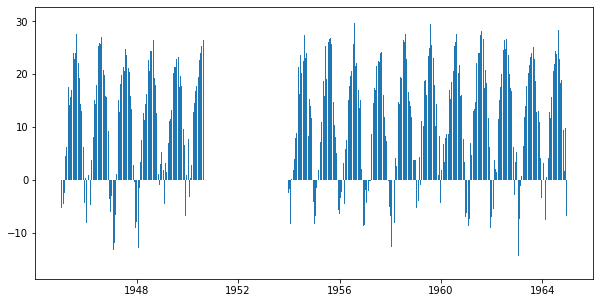

In [45]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(10,5))
plt.bar(seoul_df['일시'], seoul_df['평균기온(°C)'])
plt.show()

##서울시 연간 평균기온, 최저기온, 최고기온 변화 시각화

In [ ]:
##